In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('Assignment3_Dataset/population.csv')
df50 = pd.read_csv('Assignment3_Dataset/more_than_50k.csv')
dfdesc = pd.read_csv('Assignment3_Dataset/Dataset Description.csv')

#### Dataset description

In [41]:
dfdesc

Column Code  Distict Values                                       Column  \
0         AAGE              91                                          age   
1      ACLSWKR               9                              class of worker   
2       ADTIND              52                                industry code   
3       ADTOCC              47                              occupation code   
4         AHGA              17                                    education   
5      AHRSPAY            1240                                wage per hour   
6       AHSCOL               3                 enrolled in edu inst last wk   
7      AMARITL               7                               marital status   
8       AMJIND              24                          major industry code   
9       AMJOCC              15                        major occupation code   
10       ARACE               5                                         mace   
11     AREORGN              10                              hispanic Origin   
12        ASEX               2                                          sex   
13      AUNMEM               3                      member of a labor union   
14     AUNTYPE               6                      reason for unemployment   
15     AWKSTAT               8            full or part time employment stat   
16     CAPGAIN             132                                capital gains   
17     CAPLOSS             113                               capital losses   
18      DIVVAL            1478                         divdends from stocks   
19    FILESTAT               6                             tax filer status   
20     GRINREG               6                 region of previous residence   
21      GRINST              51                  state of previous residence   
22      HHDFMX              38           detailed household and family stat   
23      HHDREL               8      detailed household summary in household   
24     MIGMTR1              10                 migration code-change in msa   
25     MIGMTR3               9                 migration code-change in reg   
26     MIGMTR4              10               migration code-move within reg   
27     MIGSAME               3                live in this house 1 year ago   
28      MIGSUN               4                migration prev res in sunbelt   
29       NOEMP               7              num persons worked for employer   
30      PARENT               5                      family members under 18   
31    PEFNTVTY              43                      country of birth father   
32    PEMNTVTY              43                      country of birth mother   
33    PENATVTY              43                        country of birth self   
34    PRCITSHP               5                                  citizenship   
35       SEOTR               3                own business or self employed   
36      VETQVA               3   fill inc questionnaire for veteran's admin   
37       VETYN               3                            veterans benefits   
38     WKSWORK              53                         weeks worked in year   
39        YEAR               2                   data collected in the year   

           Type  
0     numerical  
1   categorical  
2   categorical  
3   categorical  
4   categorical  
5     numerical  
6   categorical  
7   categorical  
8   categorical  
9   categorical  
10  categorical  
11  categorical  
12  categorical  
13  categorical  
14  categorical  
15  categorical  
16    numerical  
17    numerical  
18    numerical  
19  categorical  
20  categorical  
21  categorical  
22  categorical  
23  categorical  
24  categorical  
25  categorical  
26  categorical  
27  categorical  
28  categorical  
29  categorical  
30  categorical  
31  categorical  
32  categorical  
33  categorical  
34  categorical  
35  categorical  
36  categorical  
37  categorical  
38    numerical  
39  categorical

In [42]:
df.shape

(199523, 40)

In [250]:
df50.shape

(3580, 40)

#### Overall we have a large number of samples, but for people with more than 50k earning per year the number of samples is low

## Preprocessing

In [454]:
def preprocess(dfog):
    df = dfog.copy()
    tcols = df.select_dtypes(exclude=[np.number]).columns
    for col in tcols:
        df[col] = df[col].str.strip()
    df.replace('?', np.nan, inplace=True)
    dropped = ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS',
               'DIVVAL','AHSCOL', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'GRINREG', 'GRINST',
               'PEFNTVTY', 'PEMNTVTY', 'PENATVTY','PRCITSHP', 'VETQVA']
    df.drop(dropped, axis=1, inplace=True)
    for column in df.columns:
        df[column].fillna(modes[column][0], inplace=True)
    binner(df)
    le = preprocessing.LabelEncoder()
    df['YEAR'] = le.fit_transform(df['YEAR'])
    le = preprocessing.LabelEncoder()
    df['ASEX'] = le.fit_transform(df['ASEX'])
    dfp = df
    ignore = ['AAGE', 'ASEX', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK', 'YEAR']
    for col in df.columns:
        if col not in ignore:
            df = pd.get_dummies(data=df, columns=[col])
    ncomp = 65
    pca = PCA(n_components=ncomp)
    principalComponents = pca.fit_transform(df)
    pcadf = pd.DataFrame(data = principalComponents)
    return dfp, pcadf

In [46]:
tcols = df.select_dtypes(exclude=[np.number]).columns

In [47]:
for col in tcols:
    df[col] = df[col].str.strip()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

#### No null values are found in the dataset
#### Missing values(denoted by ' ?') are replaced by nan

In [49]:
df.replace('?', np.nan, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

#### We can see that some of the columns now contain null values
#### MIGMTR1, MIGMTR3, MIGMTR4, and MIGSUN are missing data in more than 40% of sample, so these columns are dropped

In [51]:
df.drop(['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN'], axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [53]:
len(df) - len(df.dropna())

8962

In [54]:
len(df)

199523

#### Only 8962 out of 199,523 samples now contain null values

## Feature Analysis

### Numerical data

C:\Users\aryan\AppData\Local\Temp/ipykernel_10052/999616018.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


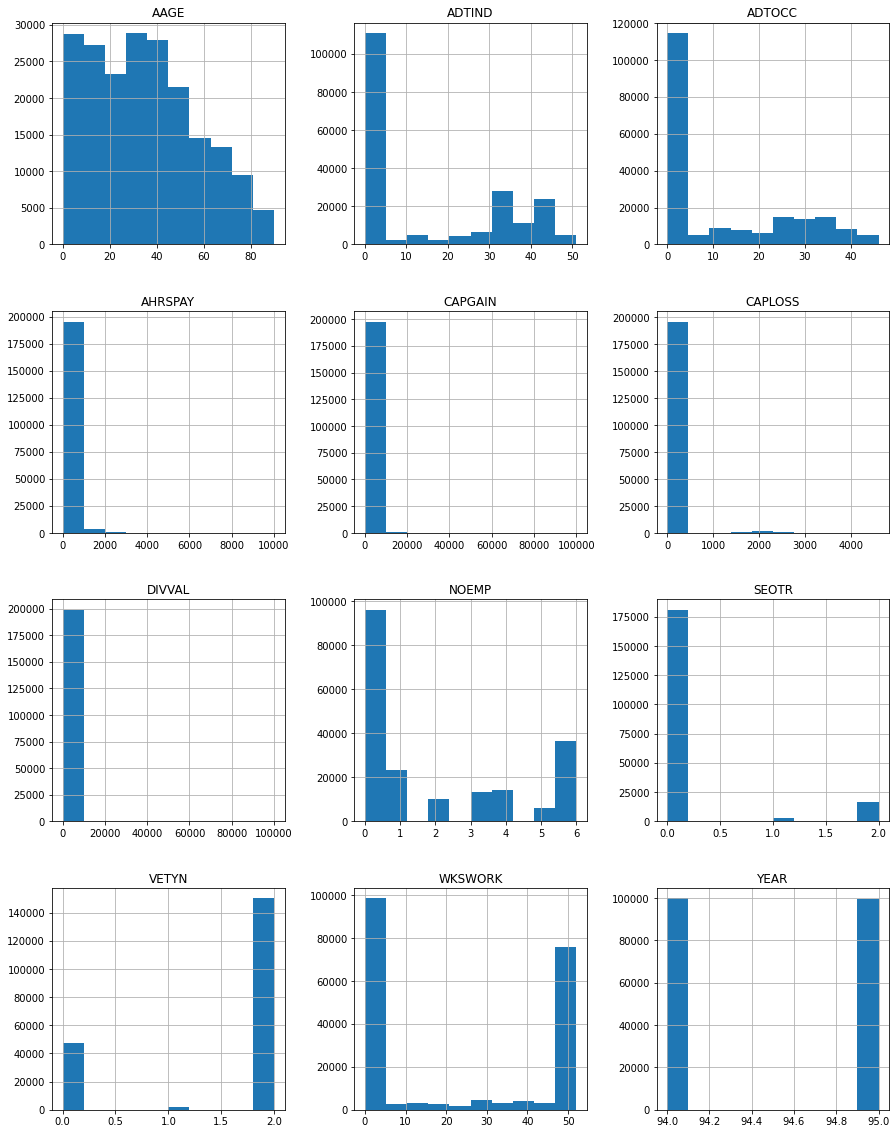

In [55]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.savefig('plots/histnum.png')

#### After Observing the above graphs, the following columns are dropped as they have most of their data in 1 column, and almost no data in the other columns
#### More than 85% data in 1 column, i.e 169,595 samples
#### Exception can be made for low number of unique values

In [56]:
dropped = ['AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL']

In [57]:
df.drop(dropped, axis=1, inplace=True)

### Categorical data

In [58]:
tcols = df.select_dtypes(exclude=[np.number]).columns
tcols

Index(['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA'],
      dtype='object')

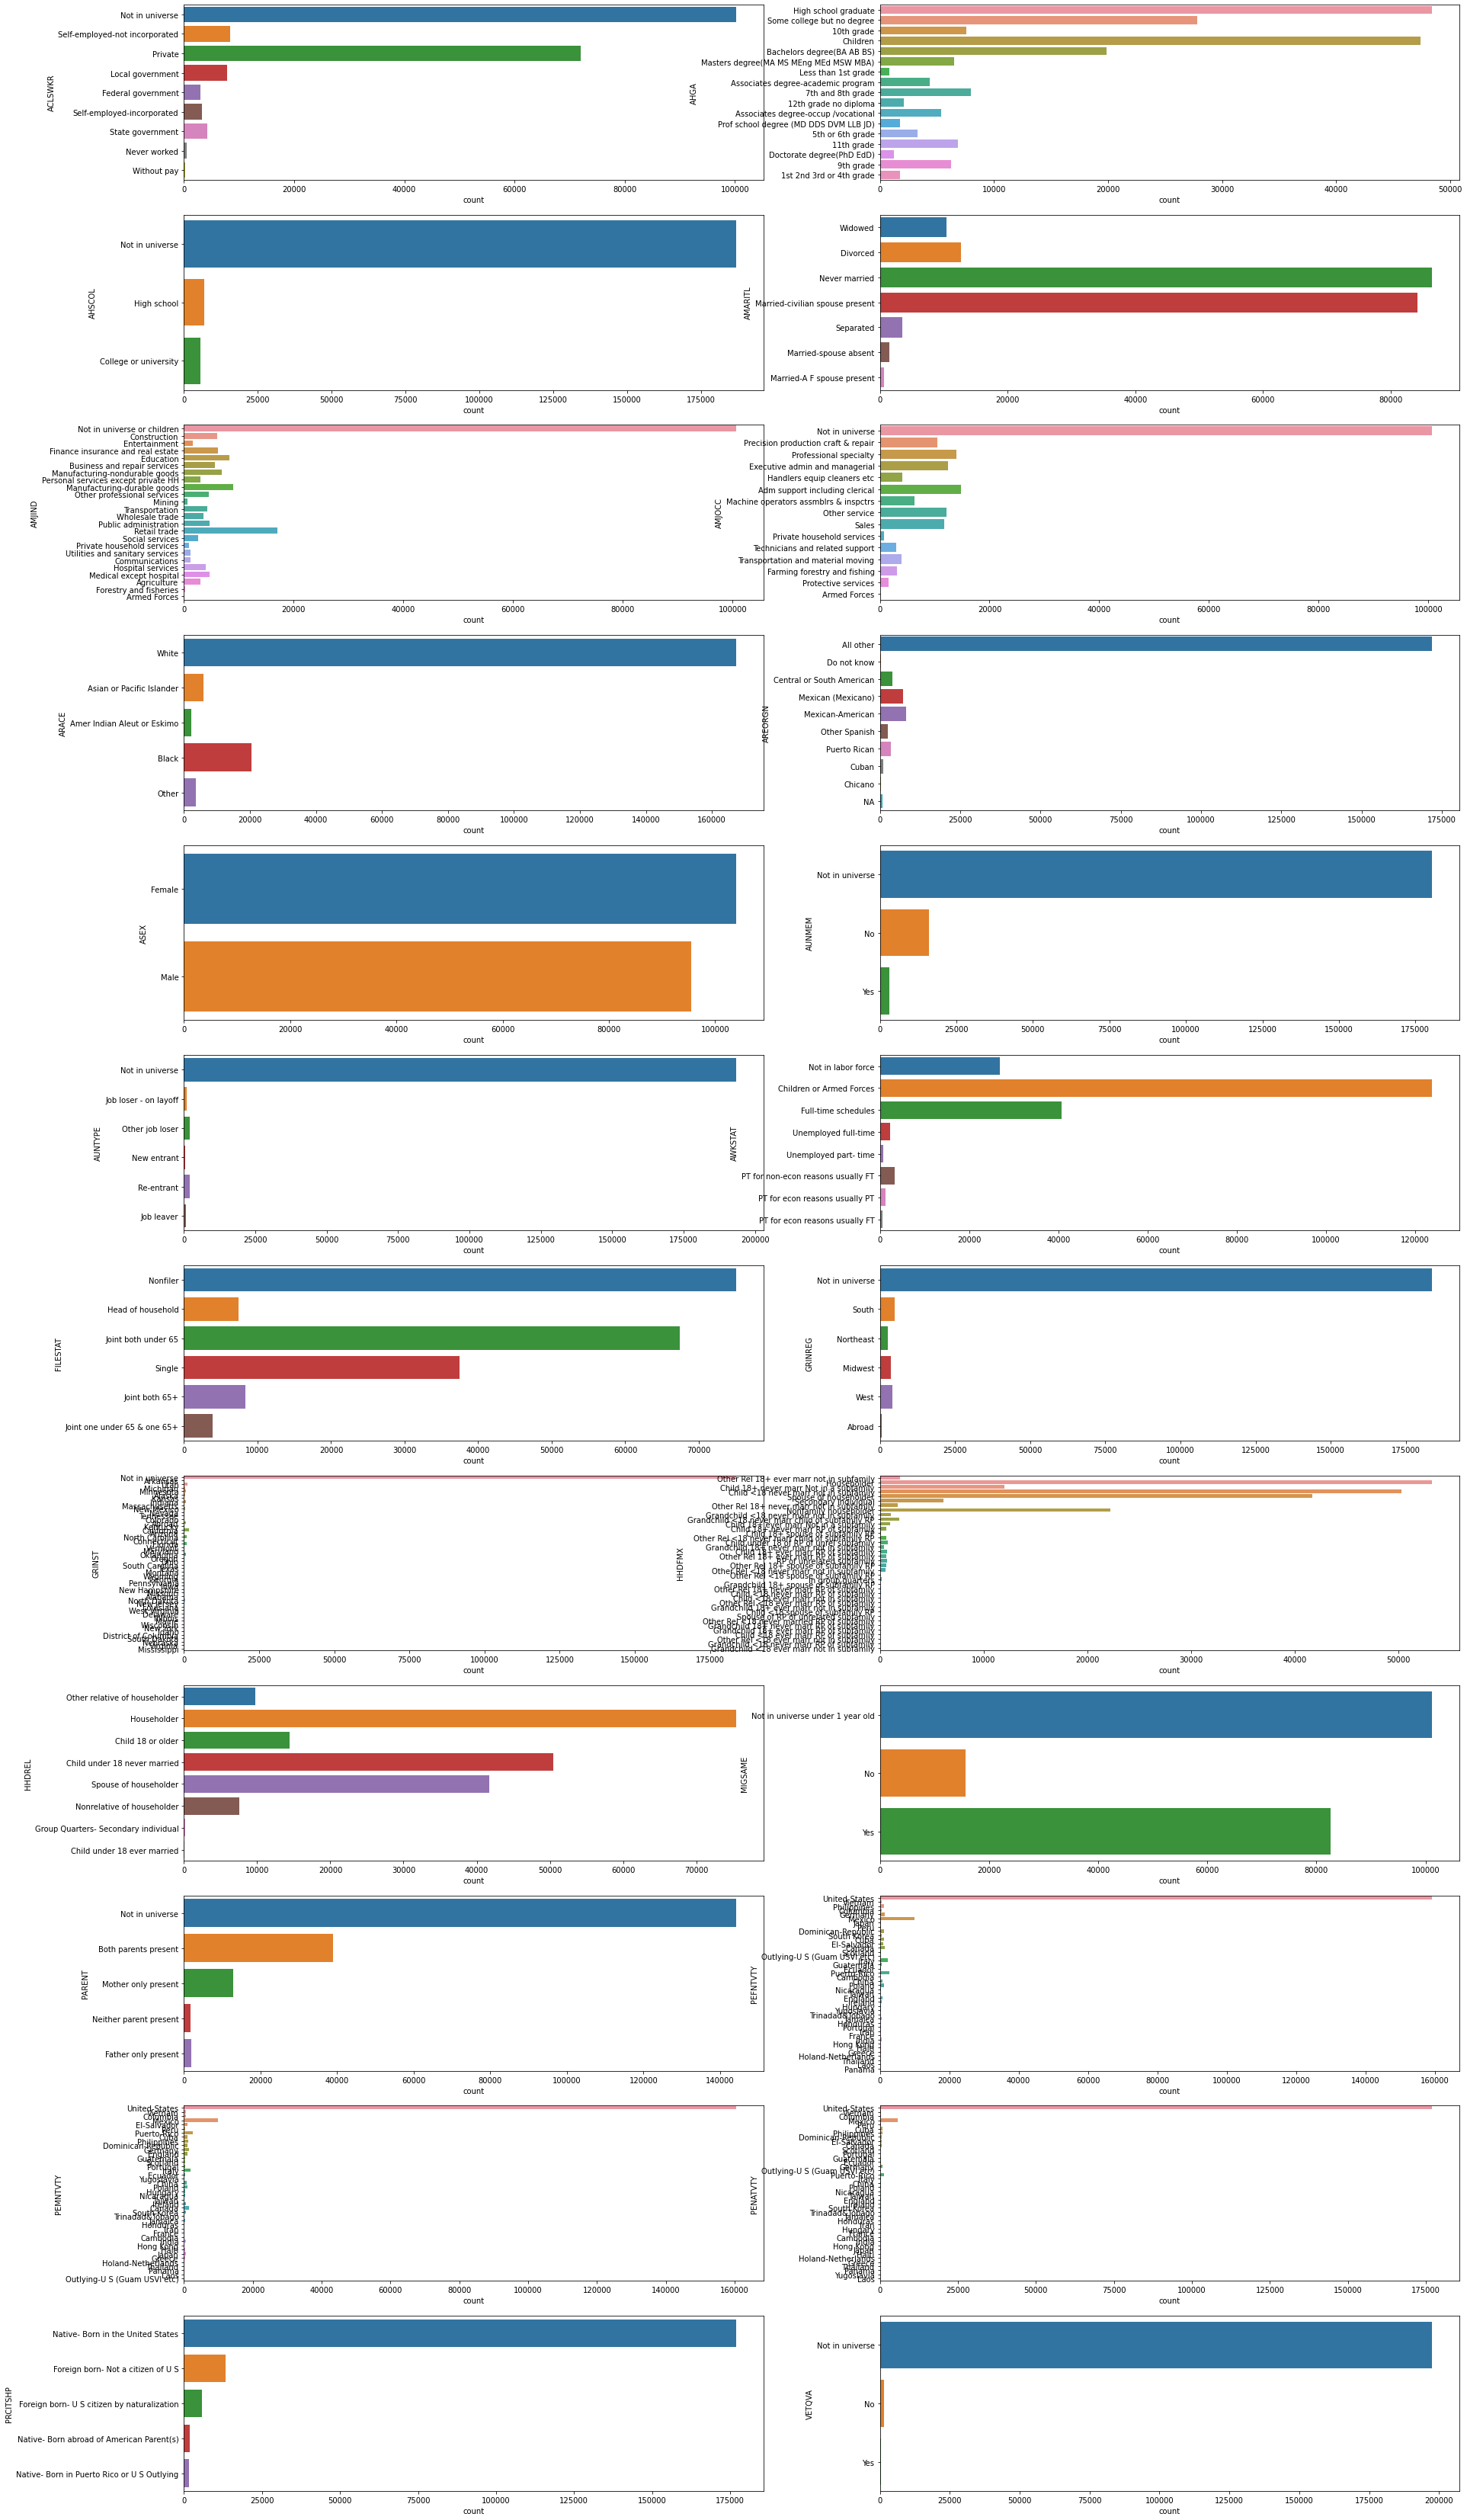

In [59]:
fig, axs = plt.subplots(12, 2, figsize=(30, 60))

for i, col in enumerate(tcols):
    sns.countplot(ax=axs[i//2, i%2], y=df[col])
plt.savefig('plots/histcat.png')

#### After Observing the above graphs, the following columns are dropped as they have most of their data in 1 column, and almost no data in the other columns
#### More than 85% data in 1 column, i.e 169,595 samples
#### Exception can be made for low number of unique values

In [60]:
dropped = ['AHSCOL', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'GRINREG', 'GRINST',
           'PEFNTVTY', 'PEMNTVTY', 'PENATVTY','PRCITSHP', 'VETQVA']

In [61]:
df.drop(dropped, axis=1, inplace=True)

In [62]:
df.head()

AAGE                         ACLSWKR  ADTIND  ADTOCC  \
0    73                 Not in universe       0       0   
1    58  Self-employed-not incorporated       4      34   
2    18                 Not in universe       0       0   
3     9                 Not in universe       0       0   
4    10                 Not in universe       0       0   

                         AHGA        AMARITL                       AMJIND  \
0        High school graduate        Widowed  Not in universe or children   
1  Some college but no degree       Divorced                 Construction   
2                  10th grade  Never married  Not in universe or children   
3                    Children  Never married  Not in universe or children   
4                    Children  Never married  Not in universe or children   

                                AMJOCC                      ARACE    ASEX  \
0                      Not in universe                      White  Female   
1  Precision production craft & repair                      White    Male   
2                      Not in universe  Asian or Pacific Islander  Female   
3                      Not in universe                      White  Female   
4                      Not in universe                      White  Female   

   ...           FILESTAT                                    HHDFMX  \
0  ...           Nonfiler  Other Rel 18+ ever marr not in subfamily   
1  ...  Head of household                               Householder   
2  ...           Nonfiler   Child 18+ never marr Not in a subfamily   
3  ...           Nonfiler     Child <18 never marr not in subfamily   
4  ...           Nonfiler     Child <18 never marr not in subfamily   

                          HHDREL                           MIGSAME NOEMP  \
0  Other relative of householder  Not in universe under 1 year old     0   
1                    Householder                                No     1   
2              Child 18 or older  Not in universe under 1 year old     0   
3   Child under 18 never married                               Yes     0   
4   Child under 18 never married                               Yes     0   

                 PARENT SEOTR  VETYN  WKSWORK  YEAR  
0       Not in universe     0      2        0    95  
1       Not in universe     0      2       52    94  
2       Not in universe     0      2        0    95  
3  Both parents present     0      0        0    94  
4  Both parents present     0      0        0    94  

[5 rows x 21 columns]

In [63]:
df.shape

(199523, 21)

#### Now we have 21 attributes

## Imputation, Bucketization, and One-hot encoding

In [64]:
modes = df.mode()
modes

AAGE          ACLSWKR  ADTIND  ADTOCC                  AHGA        AMARITL  \
0    34  Not in universe       0       0  High school graduate  Never married   

                        AMJIND           AMJOCC  ARACE    ASEX  ...  FILESTAT  \
0  Not in universe or children  Not in universe  White  Female  ...  Nonfiler   

        HHDFMX       HHDREL                           MIGSAME NOEMP  \
0  Householder  Householder  Not in universe under 1 year old     0   

            PARENT SEOTR  VETYN  WKSWORK  YEAR  
0  Not in universe     0      2        0    94  

[1 rows x 21 columns]

In [65]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AMARITL   199523 non-null  object
 6   AMJIND    199523 non-null  object
 7   AMJOCC    199523 non-null  object
 8   ARACE     199523 non-null  object
 9   ASEX      199523 non-null  object
 10  AWKSTAT   199523 non-null  object
 11  FILESTAT  199523 non-null  object
 12  HHDFMX    199523 non-null  object
 13  HHDREL    199523 non-null  object
 14  MIGSAME   199523 non-null  object
 15  NOEMP     199523 non-null  int64 
 16  PARENT    199523 non-null  object
 17  SEOTR     199523 non-null  int64 
 18  VETYN     199523 non-null  int64 
 19  WKSWORK   199523 non-null  int64 
 20  YEAR      199523 non-null 

#### There are now no nan values in our dataset

In [67]:
df.describe()

AAGE         ADTIND         ADTOCC          NOEMP  \
count  199523.000000  199523.000000  199523.000000  199523.000000   
mean       34.494199      15.352320      11.306556       1.956180   
std        22.310895      18.067129      14.454204       2.365126   
min         0.000000       0.000000       0.000000       0.000000   
25%        15.000000       0.000000       0.000000       0.000000   
50%        33.000000       0.000000       0.000000       1.000000   
75%        50.000000      33.000000      26.000000       4.000000   
max        90.000000      51.000000      46.000000       6.000000   

               SEOTR          VETYN        WKSWORK           YEAR  
count  199523.000000  199523.000000  199523.000000  199523.000000  
mean        0.175438       1.514833      23.174897      94.499672  
std         0.553694       0.851473      24.411488       0.500001  
min         0.000000       0.000000       0.000000      94.000000  
25%         0.000000       2.000000       0.000000      94.000000  
50%         0.000000       2.000000       8.000000      94.000000  
75%         0.000000       2.000000      52.000000      95.000000  
max         2.000000       2.000000      52.000000      95.000000

#### Out of the above columns with numeric values, only AAGE, NOEMP, and WKSWORK are numerical data. ADTIND and ADTOCC are codes while SEOTR, VETYN, and YEAR are categorical in nature.

In [68]:
def binner(df):
    binz = [-1, 15, 33, 50, 99]
    labelz = [0, 1, 2, 3]
    df['AAGE'] = pd.cut(df['AAGE'], binz, labels=labelz)

    binz = [-1, 1, 4, 6]
    labelz = [0, 1, 2]
    df['NOEMP'] = pd.cut(df['NOEMP'], binz, labels=labelz)

    binz = [-1, 0, 20, 45, 53]
    labelz = [0, 1, 2, 3]
    df['WKSWORK'] = pd.cut(df['WKSWORK'], binz, labels=labelz)

In [69]:
binner(df)

In [70]:
df.nunique()

AAGE         4
ACLSWKR      9
ADTIND      52
ADTOCC      47
AHGA        17
AMARITL      7
AMJIND      24
AMJOCC      15
ARACE        5
ASEX         2
AWKSTAT      8
FILESTAT     6
HHDFMX      38
HHDREL       8
MIGSAME      3
NOEMP        3
PARENT       5
SEOTR        3
VETYN        3
WKSWORK      4
YEAR         2
dtype: int64

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['YEAR'] = le.fit_transform(df['YEAR'])
le = preprocessing.LabelEncoder()
df['ASEX'] = le.fit_transform(df['ASEX'])

#### The numerical attributes and the attributes with 2 values are left as is, and the rest are one-hot encoded

In [72]:
df.head()

AAGE                         ACLSWKR  ADTIND  ADTOCC  \
0    3                 Not in universe       0       0   
1    3  Self-employed-not incorporated       4      34   
2    1                 Not in universe       0       0   
3    0                 Not in universe       0       0   
4    0                 Not in universe       0       0   

                         AHGA        AMARITL                       AMJIND  \
0        High school graduate        Widowed  Not in universe or children   
1  Some college but no degree       Divorced                 Construction   
2                  10th grade  Never married  Not in universe or children   
3                    Children  Never married  Not in universe or children   
4                    Children  Never married  Not in universe or children   

                                AMJOCC                      ARACE  ASEX  ...  \
0                      Not in universe                      White     0  ...   
1  Precision production craft & repair                      White     1  ...   
2                      Not in universe  Asian or Pacific Islander     0  ...   
3                      Not in universe                      White     0  ...   
4                      Not in universe                      White     0  ...   

            FILESTAT                                    HHDFMX  \
0           Nonfiler  Other Rel 18+ ever marr not in subfamily   
1  Head of household                               Householder   
2           Nonfiler   Child 18+ never marr Not in a subfamily   
3           Nonfiler     Child <18 never marr not in subfamily   
4           Nonfiler     Child <18 never marr not in subfamily   

                          HHDREL                           MIGSAME NOEMP  \
0  Other relative of householder  Not in universe under 1 year old     0   
1                    Householder                                No     0   
2              Child 18 or older  Not in universe under 1 year old     0   
3   Child under 18 never married                               Yes     0   
4   Child under 18 never married                               Yes     0   

                 PARENT SEOTR  VETYN  WKSWORK YEAR  
0       Not in universe     0      2        0    1  
1       Not in universe     0      2        3    0  
2       Not in universe     0      2        0    1  
3  Both parents present     0      0        0    0  
4  Both parents present     0      0        0    0  

[5 rows x 21 columns]

In [73]:
ignore = ['AAGE', 'ASEX', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK', 'YEAR']
dfone = df

for col in df.columns:
    if col not in ignore:
        dfone = pd.get_dummies(data=dfone, columns=[col])

In [74]:
dfone.head()

AAGE  ASEX NOEMP  SEOTR  VETYN WKSWORK  YEAR  ACLSWKR_Federal government  \
0    3     0     0      0      2       0     1                           0   
1    3     1     0      0      2       3     0                           0   
2    1     0     0      0      2       0     1                           0   
3    0     0     0      0      0       0     0                           0   
4    0     0     0      0      0       0     0                           0   

   ACLSWKR_Local government  ACLSWKR_Never worked  ...  \
0                         0                     0  ...   
1                         0                     0  ...   
2                         0                     0  ...   
3                         0                     0  ...   
4                         0                     0  ...   

   HHDREL_Other relative of householder  HHDREL_Spouse of householder  \
0                                     1                             0   
1                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   

   MIGSAME_No  MIGSAME_Not in universe under 1 year old  MIGSAME_Yes  \
0           0                                         1            0   
1           1                                         0            0   
2           0                                         1            0   
3           0                                         0            1   
4           0                                         0            1   

   PARENT_Both parents present  PARENT_Father only present  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            1                           0   
4                            1                           0   

   PARENT_Mother only present  PARENT_Neither parent present  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   PARENT_Not in universe  
0                       1  
1                       1  
2                       1  
3                       0  
4                       0  

[5 rows x 251 columns]

## PCA

#### We perform PCA upto 100 components then plot the cumulative variance sum vs number of components

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(dfone)
principalDf = pd.DataFrame(data = principalComponents)

In [76]:
evr = pca.explained_variance_ratio_
csr = np.cumsum(evr)
csr

array([0.35884898, 0.47788084, 0.54081023, 0.58515218, 0.62005517,
       0.64300007, 0.66358969, 0.68206582, 0.6972533 , 0.71229807,
       0.7260566 , 0.73928067, 0.75075787, 0.76109024, 0.77084236,
       0.78031254, 0.78864205, 0.79672572, 0.80354509, 0.81014867,
       0.81659699, 0.82266313, 0.82847747, 0.83424043, 0.8397505 ,
       0.84495363, 0.8499945 , 0.85467258, 0.85909326, 0.86334776,
       0.8674746 , 0.87144439, 0.87515724, 0.87875772, 0.8821147 ,
       0.88541435, 0.8886447 , 0.89184903, 0.8949733 , 0.89803974,
       0.90101385, 0.90392803, 0.90677635, 0.90957796, 0.91232444,
       0.9149215 , 0.91745485, 0.91988452, 0.92230427, 0.92453436,
       0.92673852, 0.92875436, 0.93071251, 0.93260298, 0.93446076,
       0.93629943, 0.93805665, 0.93976647, 0.94143733, 0.94303701,
       0.94456827, 0.9460766 , 0.94758185, 0.9490663 , 0.95052753,
       0.95194858, 0.95335875, 0.95470435, 0.95599104, 0.95720433,
       0.95839233, 0.9595538 , 0.96067088, 0.96176722, 0.96284

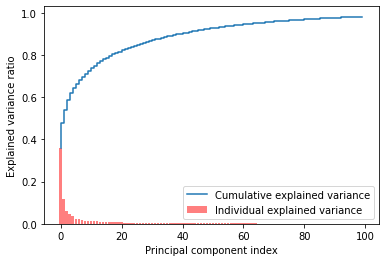

In [77]:
plt.bar(range(len(evr)), evr, alpha=0.5, label='Individual explained variance', color='red')
plt.step(range(len(csr)), csr, label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.rcParams["figure.figsize"] = (18,8)
plt.show()

#### We can see that there are heavily diminishing returns after about 40 components, and very low variance contributed after the 80th/90th component

#### 95% variance captured is a good threshold, so 65 is components are chosen

In [78]:
ncomp = 65
pca = PCA(n_components=ncomp)
principalComponents = pca.fit_transform(dfone)
pcadf = pd.DataFrame(data = principalComponents)

In [79]:
pcadf

0         1         2         3         4         5         6   \
0       0.880940 -2.590567  1.014971 -0.395124  0.603089  0.027636 -0.326995   
1      -2.120633 -0.393556 -0.778979 -1.132779 -0.968599 -1.017950 -0.757638   
2       1.666305 -0.983159  1.207904 -0.402350  1.126188 -0.123398  0.748452   
3       3.371638  1.016129 -0.802035  0.231861 -0.061648  0.087904 -0.305184   
4       3.371638  1.016129 -0.802035  0.231861 -0.061648  0.087904 -0.305184   
...          ...       ...       ...       ...       ...       ...       ...   
199518  0.442308 -2.795495  0.927320 -0.585512 -0.900538  0.073904  0.394521   
199519 -2.182516 -0.564464 -1.231513 -0.577367 -1.224583 -0.832738 -0.765958   
199520 -1.501855 -0.292391  0.340740 -0.038302 -1.258560  1.593351  0.389267   
199521  2.244822 -0.517856  1.200483 -0.092222  0.471025 -0.019049  0.084774   
199522 -1.932874  1.501583 -0.937741 -1.062405  1.065276  0.674741 -0.393121   

              7         8         9   ...        55        56        57  \
0       0.006755  0.229560  0.248048  ...  0.017080  0.078648  0.202377   
1       0.359888 -0.218363 -0.641320  ... -0.014343 -0.107129  0.085721   
2      -0.879636 -0.066066 -0.906028  ...  0.017540 -0.054533 -0.065652   
3       0.285531  0.128219  0.192658  ... -0.013434 -0.005401 -0.010866   
4       0.285531  0.128219  0.192658  ... -0.013434 -0.005401 -0.010866   
...          ...       ...       ...  ...       ...       ...       ...   
199518 -0.090216 -0.382148  0.197750  ...  0.104727 -0.034783 -0.119048   
199519  0.296177 -0.371374 -0.421509  ... -0.158494  0.199540 -0.253787   
199520 -0.041735 -0.865950 -0.515532  ...  0.034026  0.012479  0.033947   
199521 -0.094132 -0.271000  0.106667  ...  0.004891  0.017949  0.016060   
199522 -0.582520  0.958060 -0.520153  ... -0.076399 -0.032449  0.040913   

              58        59        60        61        62        63        64  
0      -0.059334  0.034027 -0.196198  0.107173  0.130377  0.043813  0.038234  
1       0.062373 -0.097073 -0.162848  0.008732  0.010085  0.113605 -0.287293  
2       0.065160 -0.042204 -0.092949 -0.177560 -0.299188 -0.242784 -0.020890  
3      -0.012518 -0.012368  0.030832 -0.016119 -0.035253  0.028179  0.048589  
4      -0.012518 -0.012368  0.030832 -0.016119 -0.035253  0.028179  0.048589  
...          ...       ...       ...       ...       ...       ...       ...  
199518  0.061451 -0.000005  0.020098 -0.086994  0.009790 -0.014815 -0.035212  
199519 -0.347075 -0.005401  0.410426  0.108707 -0.180259 -0.549755  0.124253  
199520  0.045882  0.008911 -0.024116  0.045918  0.011344 -0.009275 -0.046177  
199521 -0.012918  0.002357  0.011385  0.015943 -0.004115 -0.045887 -0.061535  
199522  0.056831 -0.063256  0.044284  0.052990  0.006035  0.000052  0.021754  

[199523 rows x 65 columns]

#### Weights for first 3 principal components mapped with features

In [484]:
fweights = pd.DataFrame(pca.components_, columns=dfone.columns)[:3]
fweights

AAGE      ASEX     NOEMP     SEOTR     VETYN   WKSWORK      YEAR  \
0 -0.301791 -0.012109 -0.247651 -0.065473 -0.302242 -0.552170 -0.006030   
1 -0.611539  0.059796  0.206498  0.074667 -0.267295  0.394273 -0.012915   
2 -0.054865 -0.002381  0.016570  0.016203  0.001183 -0.026231  0.509200   

   ACLSWKR_Federal government  ACLSWKR_Local government  ACLSWKR_Never worked  \
0                   -0.006343                 -0.016002              0.000681   
1                    0.003513                  0.007233             -0.000513   
2                   -0.000126                 -0.002111              0.000225   

   ...  HHDREL_Other relative of householder  HHDREL_Spouse of householder  \
0  ...                              0.009411                     -0.048416   
1  ...                             -0.001111                     -0.080928   
2  ...                              0.003696                     -0.017655   

   MIGSAME_No  MIGSAME_Not in universe under 1 year old  MIGSAME_Yes  \
0    0.000192                                 -0.001208     0.001016   
1    0.019661                                 -0.008559    -0.011102   
2   -0.049049                                  0.510619    -0.461569   

   PARENT_Both parents present  PARENT_Father only present  \
0                     0.116064                    0.005298   
1                     0.108805                    0.004370   
2                     0.005468                    0.000838   

   PARENT_Mother only present  PARENT_Neither parent present  \
0                    0.036827                       0.004223   
1                    0.030348                       0.002543   
2                    0.002864                       0.000542   

   PARENT_Not in universe  
0               -0.162411  
1               -0.146067  
2               -0.009712  

[3 rows x 251 columns]

## Clustering

In [81]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample

In [240]:
errors = {'clusters' : [], 'wce' : []}
clist = []
mlist = []

for i in range(10, 25):
    print(i, 'clusters')
    medians = np.random.randn(i, 65)
    kmedmodel = kmedians(pcadf[:10000], medians)
    kmedmodel.process()
    clist.append(kmedmodel.get_clusters())
    mlist.append(kmedmodel.get_medians())
    errors['clusters'].append(i)
    errors['wce'].append(kmedmodel.get_total_wce())

10 clusters
11 clusters
12 clusters
13 clusters
14 clusters
15 clusters
16 clusters
17 clusters
18 clusters
19 clusters
20 clusters
21 clusters
22 clusters
23 clusters
24 clusters


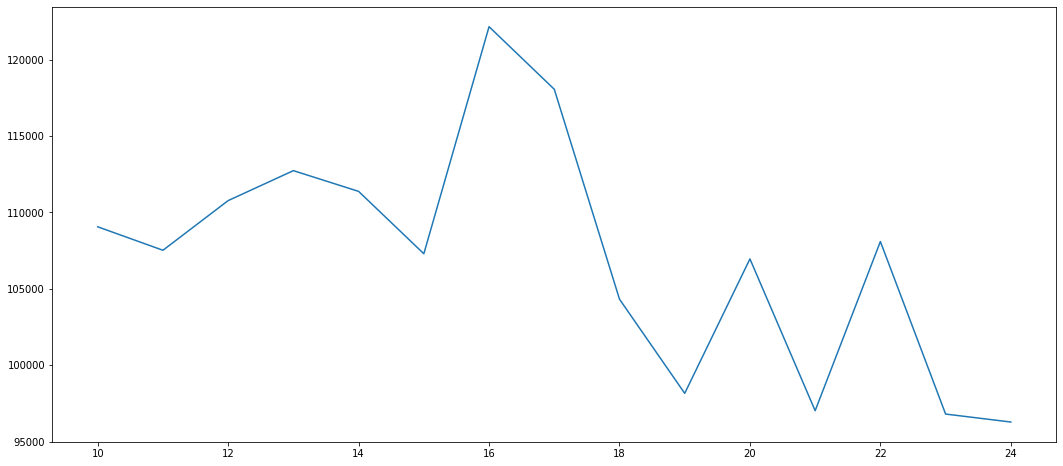

In [241]:
plt.plot(errors['clusters'], errors['wce'])

### 19 clusters are chosen

In [242]:
k = 19
medians = np.random.randn(k, 65)
model = kmedians(pcadf[:50000], medians)
model.process()

In [300]:
clusters = model.get_clusters()
cmeds = model.get_medians()

In [361]:
len(clusters)

10

In [284]:
model.get_total_wce()/50000

12.530904942245966

## processing morethan50k dataset

In [455]:
dfp50, pcadf50 = preprocess(df50)
pcadf50.head()

0         1         2         3         4         5         6   \
0 -0.588750  0.624992 -1.361102 -0.288084 -0.121129 -0.621812  0.220019   
1  0.638367 -0.911442  0.305966  1.425837 -0.150868 -0.375197 -0.354228   
2  0.494419 -1.254703 -0.353666 -0.380613  0.852623  0.095862 -0.390895   
3 -1.043181  0.786872  1.219386 -0.321217 -1.117580 -1.076549  0.877117   
4 -1.636056  0.150624  0.742127  1.537581  0.312320 -0.041945 -0.392359   

         7         8         9   ...        55        56        57        58  \
0 -1.011519  0.144141 -0.298154  ... -0.057473  0.028465  0.235233  0.158989   
1  0.366482  0.792910 -0.268428  ... -0.933513  0.706547 -0.345057  0.798134   
2 -0.224594  0.905999 -0.039190  ... -0.056459  0.079805  0.042897 -0.001984   
3  0.374670 -0.119834 -0.346682  ... -0.041967 -0.070430  0.014514 -0.038182   
4  1.017004 -0.549501  0.452768  ...  0.040536  0.082348  0.514273  0.255422   

         59        60        61        62        63        64  
0  0.172172  0.240588  0.310386 -0.364529 -0.081720  0.236217  
1 -0.050155  0.194814 -0.082674  0.237784  0.275599  0.217158  
2 -0.144955  0.023049 -0.090178 -0.056908 -0.166323  0.165958  
3 -0.005100  0.131354 -0.080585  0.094183  0.210917  0.281260  
4  0.552622  0.353186  0.070327 -0.106462 -0.215732  0.192735  

[5 rows x 65 columns]

In [474]:
k = 19
medians = np.random.randn(k, 65)
model50 = kmedians(pcadf50, medians)
model50.process()

In [476]:
clusters50 = model50.get_clusters()
cmeds50 = model50.get_medians()

In [477]:
model50.get_total_wce()/len(df50)

11.772276994686845

In [478]:
len(clusters50)

10

### We can see that avg distance from median for the samples is similar in both datasets

In [479]:
cdata = []
cdata50 = []

for c in clusters:
    cdata.append(df.iloc[c])
for c in clusters50:
    cdata50.append(df.iloc[c])

In [480]:
prop = []

for cls in cdata:
    prop.append(len(cls))
prop = np.array(prop)
total = prop.sum()
prop = prop / total
prop

array([0.16702, 0.04274, 0.26752, 0.01622, 0.16726, 0.18418, 0.0401 ,
       0.0427 , 0.06398, 0.00828])

<BarContainer object of 10 artists>

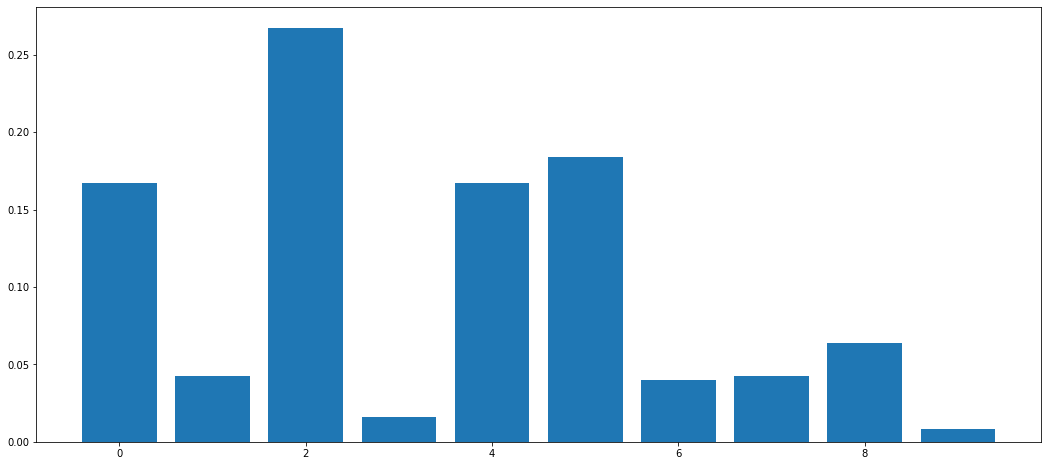

In [481]:
plt.bar(np.arange(len(prop)), prop)

In [482]:
prop50 = []

for cls in cdata50:
    prop50.append(len(cls))
prop50 = np.array(prop50)
total = prop50.sum()
prop50 = prop50 / total
prop50

array([0.02290503, 0.08882682, 0.27541899, 0.02402235, 0.05893855,
       0.0877095 , 0.01284916, 0.14608939, 0.22318436, 0.06005587])

<BarContainer object of 10 artists>

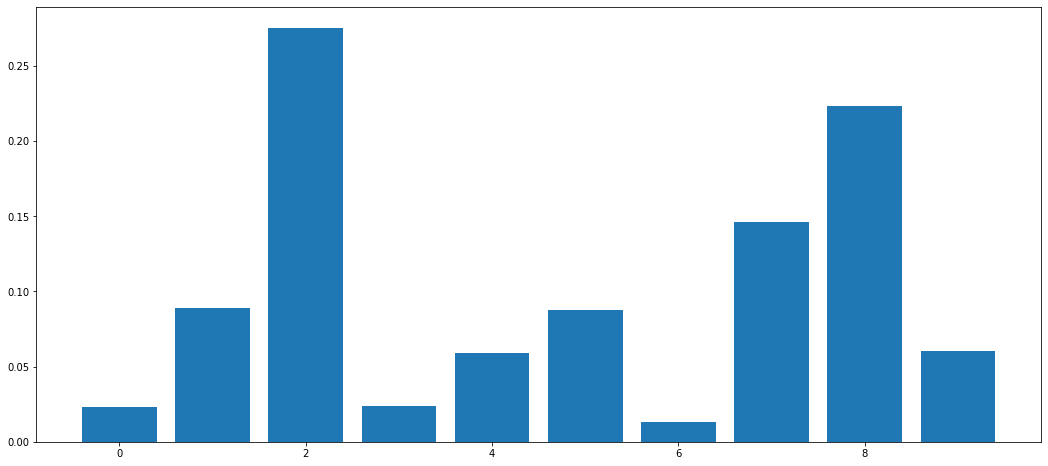

In [483]:
plt.bar(np.arange(len(prop50)), prop50)

#### Data in the morethan50k dataset is more evenly distributed among the clusters, while in the full population some clusters contain a very large or very small number of samples

### Cluster 2 is heavily present in the general population

In [470]:
cdata[2].describe()

ADTIND        ADTOCC          ASEX         SEOTR         VETYN  \
count  13376.000000  13376.000000  13376.000000  13376.000000  13376.000000   
mean       0.186678      0.193929      0.504112      0.001196      0.229815   
std        2.586592      2.567736      0.500002      0.048899      0.637844   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max       51.000000     46.000000      1.000000      2.000000      2.000000   

               YEAR  
count  13376.000000  
mean       0.495963  
std        0.500002  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [472]:
dfp50.describe()

ADTIND       ADTOCC         ASEX        SEOTR        VETYN  \
count  3580.000000  3580.000000  3580.000000  3580.000000  3580.000000   
mean     29.218994    11.978492     0.780168     0.260894     1.982402   
std      15.440051    11.982703     0.414191     0.637456     0.131503   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%      16.000000     2.000000     1.000000     0.000000     2.000000   
50%      33.000000     8.000000     1.000000     0.000000     2.000000   
75%      42.000000    17.000000     1.000000     0.000000     2.000000   
max      51.000000    46.000000     1.000000     2.000000     2.000000   

              YEAR  
count  3580.000000  
mean      0.532402  
std       0.499019  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

#### From the above descriptions we can see that there are a 

In [491]:
sorted(fweights.iloc[0])

[-0.5521699013418048,
 -0.30224162852164715,
 -0.30179145433419996,
 -0.24765059520433919,
 -0.1624113794619658,
 -0.1397640261382854,
 -0.1181629714169747,
 -0.11706223612404733,
 -0.09756574204149789,
 -0.08605068792628584,
 -0.07910430993199254,
 -0.06547308815337821,
 -0.05612712540636578,
 -0.04841635711985783,
 -0.04839675781404589,
 -0.04737198294548526,
 -0.034594330848371775,
 -0.031837386445592135,
 -0.029585317304683945,
 -0.029554209484219485,
 -0.029554209484219485,
 -0.029128339506817664,
 -0.027380096642671086,
 -0.022263171302135072,
 -0.02122835329657513,
 -0.01976343514194191,
 -0.019473852862343703,
 -0.01927750572926011,
 -0.01844746816686339,
 -0.01721431468632804,
 -0.01664169403400307,
 -0.01664169403400307,
 -0.016002164656761533,
 -0.015423341998687392,
 -0.014719348604016516,
 -0.014351496482694385,
 -0.013762428934765907,
 -0.01304168482786819,
 -0.012621373799400277,
 -0.012609823659167248,
 -0.012109426135797217,
 -0.011360372140110656,
 -0.0108541327171464